
# 2 - Data exploration


In [1]:
# import parameters
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

## 2.1 Incidents data overview

In [2]:
incidents = pd.read_excel('../data/incidents_2019-08-09/hl2010toPresent.xlsx', 
                          sheet_name=1)

incidents.sample(5)

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
553,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20110333,18579,2011-09-09 17:22:23,SUPPLEMENTAL FINAL,...,PIPELINE SAFETY ADVISOR,thad.massengale@exxonmobil.com,713-656-2258,713-656-8232,2011-09-09,GARY W. HARTMANN,SHE MANAGER,713-656-0227,gary.w.hartmann@exxonmobil.com,INBOARD SEAL FAILURE ON PUMP
2390,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20160054,21158,2016-02-25 09:58:08,ORIGINAL FINAL,...,DOT COORDINATOR,cully.r.farhar@p66.com,303-862-1189,NaN,2016-02-25,TODD TULLIO,REGULATORY COMPLIANCE MANAGER,832-765-1636,todd.l.tullio@p66.com,DURING ROUTINE OPERATOR ROUNDS AT APPROXIMATEL...
1474,2019-07-31 08:37:40,NO,NO,YES,NO,NO,20140042,20030,2014-02-05 16:08:45,SUPPLEMENTAL FINAL,...,COMPLIANCE SPECIALIST,cclark@buckeye.com,734-777-8993,NaN,2015-01-07,CLAUDIA PANKOWSKI,DIRECTOR REGULATORY COMPLIANCE,610-904-4113,cpankowski@buckeye.com,"ON JANUARY 8, 2014 AT APPROXIMATELY 12:57 AN O..."
2113,2019-07-31 08:37:40,YES,NO,NO,NO,NO,20150246,20577,2015-07-08 16:03:54,SUPPLEMENTAL FINAL,...,REGULATORY COMPLIANCE COORDINATOR,neal.jones@oneok.com,580-395-6304,580-395-2933,2015-07-10,NEAL JONES,REGULATORY COMPLIANCE COORDINATOR,580-395-6304,neal.jones@oneok.com,"ON TUESDAY, JUNE 16, 2015, AT 5:00 PM ONEOK EM..."
1522,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20140091,19121,2014-03-12 19:57:33,ORIGINAL FINAL,...,DOT COORDINATOR,jeff.blatchford@p66.com,918-977-4206,NaN,2014-03-12,TODD TULLIO,REGULATORY COMPLIANCE MANAGER,832-765-1636,todd.l.tullio@p66.com,"FEBRUARY 28, 2013 AT APP. 14:29 THE MAINLINE I..."


In [3]:
incidents['NAME'].value_counts().head(10)

ENTERPRISE CRUDE PIPELINE LLC          276
ENTERPRISE PRODUCTS OPERATING LLC      214
SUNOCO PIPELINE L.P.                   211
PLAINS PIPELINE, L.P.                  203
MAGELLAN PIPELINE COMPANY, LP          180
COLONIAL PIPELINE CO                   177
BUCKEYE PARTNERS, LP                   148
PHILLIPS 66 PIPELINE LLC               121
KINDER MORGAN LIQUID TERMINALS, LLC    117
MARATHON PIPE LINE LLC                 111
Name: NAME, dtype: int64

In [4]:
incidents['OPERATOR_ID'].value_counts().head(10)

30829    282
31618    214
18718    211
300      202
22610    180
2552     177
31684    155
1845     148
26041    117
32109    112
Name: OPERATOR_ID, dtype: int64

In [5]:
incidents['COMMODITY_RELEASED_TYPE'].unique()

array(['REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS',
       'CO2 (CARBON DIOXIDE)',
       'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS',
       'CRUDE OIL',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

There seem to be some minor discrepancies between ID and name. Matching every ID to its most common company name should fix it. 

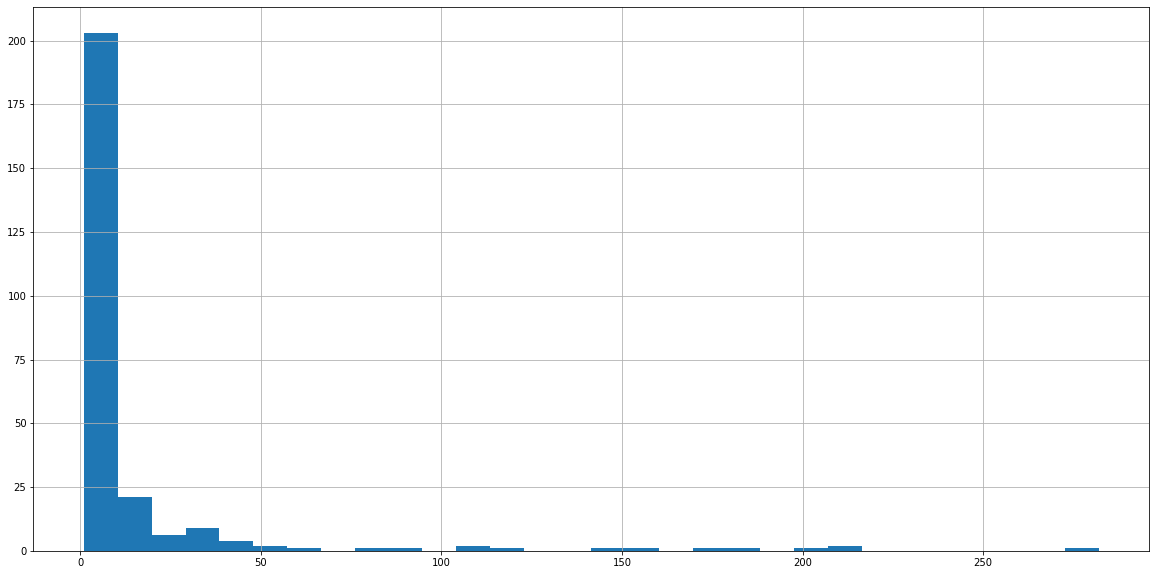

In [6]:
incidents['OPERATOR_ID'].value_counts().hist(bins=30, figsize=(20, 10))

In [7]:
len(incidents)

3819

## 2.2 Oil pipeline data

In [8]:
oil_pipelines = pd.read_excel('../data/pipelines_2010_present_2019-08-09/annual_hazardous_liquid_2010.xlsx', skiprows=2)

oil_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
57,2019-08-01 13:10:42,2010,20120105,11136,5524,FOUR STAR OIL & GAS CO,1400 Smith Street Houston,ODESSA,TX,797002,...,0.0,0.0,0.0,15.100,15.100,0.0,INITIAL,2012-06-01 10:22:46,2012-06-01 10:22:46,7000-1.1 (Rev. 06-2011)
131,2019-08-01 13:10:42,2010,20110049,10049,21359,SASOL NORTH AMERICA,900 Threadneedle,WESTLAKE,TX,77079,...,0.0,0.0,0.0,0.300,0.300,0.0,INITIAL,2011-08-04 14:01:42,2011-08-04 14:01:42,7000-1.1 (Rev. 06-2011)
16,2019-08-01 13:10:42,2010,20110001,10001,1541,"BP PIPELINES (ALASKA), INC",900 E Benson Blvd,ANCHORAGE,AK,99519,...,0.0,0.0,0.0,10.531,10.531,0.0,INITIAL,2011-07-26 13:55:56,2011-07-26 13:55:56,7000-1.1 (Rev. 06-2011)
34,2019-08-01 13:10:42,2010,20110208,12733,2731,CHEVRON PIPE LINE CO,4800 FOURNACE PLACE,BELLAIRE,TX,774012324,...,0.0,0.0,0.0,3094.000,1566.000,1528.0,SUPPLEMENTAL,2011-08-14 17:43:48,2014-06-09 09:11:17,7000-1.1 (Rev. 06-2011)
264,2019-08-01 13:10:42,2010,20110244,10248,31428,MERIT ENERGY COMPANY,13727 NOEL RD.,DALLAS,TX,75240,...,0.0,0.0,0.0,20.000,20.000,0.0,INITIAL,2011-08-15 11:36:07,2011-08-15 11:36:07,7000-1.1 (Rev. 06-2011)


In [9]:
from os import listdir

pipeline_files = [file for file in listdir('../data/pipelines_2010_present_2019-08-09/') if'annual_hazardous_liquid' in file]
pipeline_files

['annual_hazardous_liquid_2017.xlsx',
 'annual_hazardous_liquid_2011.xlsx',
 'annual_hazardous_liquid_2014.xlsx',
 'annual_hazardous_liquid_2012.xlsx',
 'annual_hazardous_liquid_2013.xlsx',
 'annual_hazardous_liquid_2010.xlsx',
 'annual_hazardous_liquid_2018.xlsx',
 'annual_hazardous_liquid_2016.xlsx',
 'annual_hazardous_liquid_2015.xlsx']

In [10]:
pipelines = pd.concat([pd.read_excel(f'../data/pipelines_2010_present_2019-08-09/{file}', skiprows=2) for file in pipeline_files])
pipelines = pipelines.reset_index(drop = True)

pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
1042,2019-08-01 13:14:22,2011,20120238,13199,32011,"HOLLY ENERGY PARTNERS - OPERATING, L.P.",2828 N. HARWOOD,DALLAS,TX,75201,...,0.0,0.0,0.0,159.000,148.000,11.0,SUPPLEMENTAL,2012-06-13 16:38:10,2014-08-22 13:23:28,7000-1.1 (Rev. 06-2011)
197,2019-08-01 13:58:36,2017,20183321,15847,30829,ENTERPRISE CRUDE PIPELINE LLC,1100 Louisiana Street,Houston,TX,77002,...,0.0,0.0,0.0,9.264,9.264,0.0,INITIAL,2018-06-12 09:58:23,2018-06-12 09:58:23,7000-1.1 (Rev. 06-2014)
2822,2019-08-01 13:23:46,2013,20140820,12832,38952,APL ARKOMA HOLDINGS LLC,110 WEST 7TH STREET SUITE 2300,TULSA,OK,74119,...,0.0,0.0,0.0,15.326,15.326,0.0,INITIAL,2014-06-12 08:50:51,2014-06-12 08:50:51,7000-1.1 (Rev. 06-2011)
3837,2019-08-01 14:04:12,2018,20190311,16777,39065,HESS ND,3015 16TH ST. SW SUITE 20,MINOT,ND,58701,...,3.8,0.0,3.8,3.800,3.800,0.0,SUPPLEMENTAL,2019-06-11 16:54:57,2019-06-12 12:26:27,7000-1.1 (Rev. 06-2014)
409,2019-08-01 13:58:36,2017,20183376,15903,32410,"GENESIS FREE STATE PIPELINE, LLC",919 MILAM; SUITE 2100,HOUSTON,TX,77002-5417,...,0.0,0.0,0.0,90.620,90.620,0.0,INITIAL,2018-06-13 08:02:52,2018-06-13 08:02:52,7000-1.1 (Rev. 06-2014)


See which company has the vastest pipeline network.

In [11]:
pipelines.loc[pipelines.groupby('OPERATOR_ID')['PARTBHCATOTAL'].idxmax()].nlargest(10, 'PARTBHCATOTAL')[['REPORT_YEAR', 'OPERATOR_ID', 'PARTA2NAMEOFCOMP', 'PARTBHCATOTAL']]

,REPORT_YEAR,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTBHCATOTAL
3634,2018,31618,ENTERPRISE PRODUCTS OPERATING LLC,7726.183
3704,2018,32109,"ONEOK NGL PIPELINE, LLC",4531.480
4723,2015,2552,COLONIAL PIPELINE CO,4500.920
4715,2015,1845,"BUCKEYE PARTNERS, LP",4266.430
3484,2018,22610,"MAGELLAN PIPELINE COMPANY, LP",3926.400
4135,2016,15674,PLANTATION PIPE LINE CO,2564.730
4035,2016,300,"PLAINS PIPELINE, L.P.",2312.330
67,2017,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",2290.000
3186,2010,31684,CONOCOPHILLIPS,2283.790
2693,2013,32147,MARATHON PIPE LINE LLC,2281.900


In [12]:
pipelines['PARTA5COMMODITY'].unique()

array(['Crude Oil', 'HVL', 'Refined and/or Petroleum Product (non-HVL)',
       'CO2', 'Fuel Grade Ethanol (dedicated system)'], dtype=object)

Compare to

In [13]:
incidents['COMMODITY_RELEASED_TYPE'].unique()

array(['REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS',
       'CO2 (CARBON DIOXIDE)',
       'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS',
       'CRUDE OIL',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

The types correspond well, but the terminology is different.

## 2.3 Gas pipelines

In [14]:
gas_pipelines = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2015.xlsx', skiprows=1)

gas_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA2NAMEOFPARENT_COM,PARTA3NAME,PARTA3TITLE,PARTA3EMAIL,...,PARTA4ZIP,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV,PARTNPREPNAME,PARTNPREPTITLE,PARTNPREPEMAIL,PARTNPREPPHONE,PARTNPREPFAX
35,2019-08-01 14:19:07,2015,20160323,596,13750,NORTHERN NATURAL GAS CO,NaN,Deb DeBoer,Sr. Pipeline Safety Specialist,deb.deboer@nngco.com,...,68124,INITIAL,2016-03-11 11:54:48,2016-03-11 11:54:48,7100.3-1 (Rev. 10-2014),Deb DeBoer,Sr. Pipeline Safety Specialist,deb.deboer@nngco.com,(402)398-7245,NaN
79,2019-08-01 14:19:07,2015,20160256,520,39053,"LNG INDY, LLC",Citizens Energy Group,Anthony Hopwood,Director of Operations,Ahopwood@kinetrexenergy.com,...,46107,INITIAL,2016-01-12 11:21:37,2016-01-12 11:21:37,7100.3-1 (Rev. 10-2014),Craig Moore,Senior Vice President and COO,cmoore@kinetrexenergy.com,(317)504-0009,NaN
12,2019-08-01 14:19:07,2015,20160331,604,2604,COLUMBIA GAS OF VIRGINIA INC,"NiSource, Inc.",David Cicoria,"Manager, System Operations",dcicoria@nisource.com,...,23836,INITIAL,2016-03-14 16:42:59,2016-03-14 16:42:59,7100.3-1 (Rev. 10-2014),Brian Powell,Integrity Management Engineer,bpowell@nisource.com,(614)481-1069,NaN
49,2019-08-01 14:19:07,2015,20160257,521,16667,ENERGY NORTH NATURAL GAS INC,NaN,Ryan Burns,Gas Planning Engineer,Ryan.Burns@LibertyUtilities.com,...,03053,INITIAL,2016-01-13 14:53:51,2016-01-13 14:53:51,7100.3-1 (Rev. 10-2014),Ryan Burns,Gas Planning Engineer,Ryan.Burns@LibertyUtilities.com,(978)866-2637,NaN
26,2019-08-01 14:19:07,2015,20160317,588,11713,KEYSPAN ENERGY DELIVERY - LONG ISLAND,National Grid,Thomas Kennedy,"Manager, LNG NY",thomas.kennedy@nationalgrid.com,...,02451,INITIAL,2016-03-10 09:21:13,2016-03-10 09:21:13,7100.3-1 (Rev. 10-2014),Steve Sechovicz,Principle Engineer,stephen.sechovicz@nationalgrid.com,(617)822-5412,NaN


In [15]:
gas_files = [file for file in listdir('../data/gas_2010_present_2019-08-09/') if'annual_liquefied_natural_gas' in file]
gas_files

['annual_liquefied_natural_gas_2013.xlsx',
 'annual_liquefied_natural_gas_2011.xlsx',
 'annual_liquefied_natural_gas_2016.xlsx',
 'annual_liquefied_natural_gas_2012.xlsx',
 'annual_liquefied_natural_gas_2017.xlsx',
 'annual_liquefied_natural_gas_2018.xlsx',
 'annual_liquefied_natural_gas_2010.xlsx',
 'annual_liquefied_natural_gas_2014.xlsx',
 'annual_liquefied_natural_gas_2015.xlsx']

In [16]:
gas = pd.concat([pd.read_excel(f'../data/gas_2010_present_2019-08-09/{file}', skiprows=1) for file in gas_files[:3]], sort=False)
gas = gas.reset_index(drop = True)

gas.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA2NAMEOFPARENT_COM,PARTA3NAME,PARTA3TITLE,PARTA3EMAIL,...,PARTA4ZIP,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV,PARTNPREPNAME,PARTNPREPTITLE,PARTNPREPEMAIL,PARTNPREPPHONE,PARTNPREPFAX
175,2019-08-01 14:20:39,2016,20170378,684,2700,CONNECTICUT NATURAL GAS CORP,Avangrid,David J. Fritsch,"Director, Production and Gas Control",dfritsch@ctgcorp.com,...,06108,INITIAL,2017-03-01 15:25:04,2017-03-01 15:25:04,7100.3-1 (Rev. 10-2014),Thomas Kennedy,"Manager, LNG Plant",tkennedy@ctgcorp.com,(860)727-3529,(860)529-4112
67,2019-08-01 14:16:07,2013,20140156,394,31636,NORTHERN STATES POWER CO OF MINNESOTA,"Xcel Energy, Inc.",Ron Shilts,Gas Plant Maintenance Supervisor,Ronald.C.Shilts@xcelenergy.com,...,55402,SUPPLEMENTAL,2014-03-13 15:07:05,2014-12-05 12:45:10,7100.3-1 (Rev. 06-2011),Lisa Kallberg,Principal Gas Standards Consultant,elisabeth.m.kallberg@xcelenergy.com,(651) 229-2282,(651) 229-2396
239,2019-08-01 14:20:39,2016,20170348,652,32684,"PINE NEEDLE OPERATING COMPANY,LLC",NaN,Edgar Rodriguez,Regulatory Compliance Specialist Sr.,edgar.x.rodriguez@williams.com,...,77056,INITIAL,2017-01-26 14:11:43,2017-01-26 14:11:43,7100.3-1 (Rev. 10-2014),Edgar Rodriguez,Regulatory Compliance Specialist Sr.,edgar.x.rodriguez@williams.com,(713)215-2846,(713)215-3444
109,2019-08-01 14:12:58,2011,20120001,138,11713,KEYSPAN ENERGY DELIVERY - LONG ISLAND,National Grid,Gregory Schneller,Manager,gregory.schneller@us.ngrid.com,...,11747,SUPPLEMENTAL,2012-02-17 09:21:29,2013-02-12 06:36:32,7100.3-1 (Rev. 06-2011),Steven Renna,Lead Engineer,steven.renna@us.ngrid.com,(631) 471-1660,(631) 471-1601
191,2019-08-01 14:20:39,2016,20170363,668,12390,METROPOLITAN UTILITIES DISTRICT,NaN,William Rice,Manager Gas Plants,bill_rice@mudnebr.com,...,68102,INITIAL,2017-02-17 17:11:40,2017-02-17 17:11:40,7100.3-1 (Rev. 10-2014),William Rice,Operator,bill_rice@mudnebr.com,(402)504-7353,NaN


The warning stems from the fact that the PARTA4NAMEOFCOMP columns was dropped, starting from 2014 (see below). Fortunately, we can use the field "PARTA2NAMEOFCOMP" and "PARTA2NAMEOFPARENT_COM" to get the information.

In [17]:
gas_columns_2010 = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2010.xlsx', skiprows=1, skipfooter=999).columns.tolist()
gas_columns_2014 = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2014.xlsx', skiprows=1, skipfooter=999).columns.tolist()
set(gas_columns_2010) - set(gas_columns_2014)

{'PARTA4NAMEOFCOMP'}

## 2.4. Where do incidents occur? Regular, or LNG pipelines?

### 2.4.1 Are there operators who operate both regular and LNG pipelines?

In [18]:
gas_operators = np.unique(gas['OPERATOR_ID']).tolist()
gas_operators[:5]

[180, 630, 792, 909, 1088]

In [19]:
pipeline_operators = np.unique(pipelines['OPERATOR_ID']).tolist()
pipeline_operators[:5]

[300, 395, 401, 402, 473]

In [20]:
common_operators = set(gas_operators).intersection(set(pipeline_operators))
print(common_operators)

{31636}


Only one company occurs on both lists.

In [21]:
pipelines.loc[pipelines['OPERATOR_ID'].isin(common_operators) & (pipelines['REPORT_YEAR'] == 2017)]['PARTA2NAMEOFCOMP'].tolist()

['NORTHERN STATES POWER CO OF MINNESOTA']

### 2.4.2 Where do the accidents occur?

In [22]:
incidents.loc[incidents['OPERATOR_ID'] == 31636]

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE


Our common operators has no incidents, so we can ignore this segment.

In [23]:
regular_pipeline_incidents = incidents['OPERATOR_ID'].isin(pipelines['OPERATOR_ID']).sum()
regular_pipeline_incidents

3814

In [24]:
nlg_pipeline_incidents = incidents['OPERATOR_ID'].isin(gas['OPERATOR_ID']).sum()
nlg_pipeline_incidents

0

Looks like we can ignore this second dataset for our analysis.

## 2.5 Pipeline age - distribution and missingness

In [25]:
import rpy2.rinterface

In [26]:
%load_ext rpy2.ipython

In [27]:
pipelines_age = pipelines[['OPERATOR_ID', 'REPORT_YEAR', 'PARTEUNKNTOTAL', 'PARTEPRE40TOTAL'] + 
                          [f'PARTE19{decade}0TOTAL' for decade in range(5,10)] + 
                          ['PARTE2000TOTAL', 'PARTE2010TOTAL', 'PARTETOTAL']]
pipelines_age.sample(5)

,OPERATOR_ID,REPORT_YEAR,PARTEUNKNTOTAL,PARTEPRE40TOTAL,PARTE1950TOTAL,PARTE1960TOTAL,PARTE1970TOTAL,PARTE1980TOTAL,PARTE1990TOTAL,PARTE2000TOTAL,PARTE2010TOTAL,PARTETOTAL
390,32285,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2872,473,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,0.00,155.00
3066,30781,2010,0.0,0.0,0.0,290.0,86.0,2.0,5.0,1.0,0.00,384.00
2181,32277,2012,0.0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.00,51.00
4557,39050,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.22,6.22


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



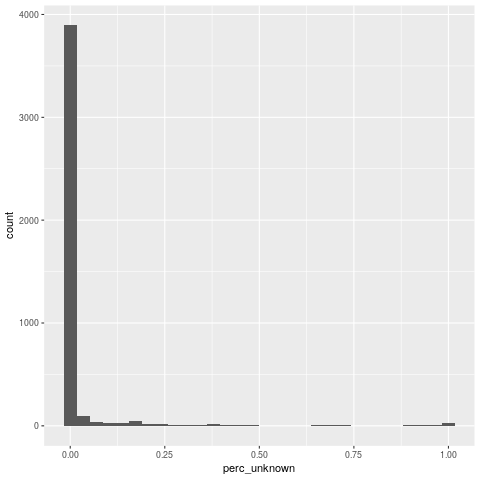

In [28]:
%%R -i pipelines_age
suppressMessages(library(tidyverse))

pipelines_age %>%
    group_by(OPERATOR_ID, REPORT_YEAR) %>%
    mutate(perc_unknown = PARTEUNKNTOTAL / PARTETOTAL) %>%
    ggplot(aes(x=perc_unknown)) + 
    geom_histogram()

Unknown age fortunately is not an issue.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



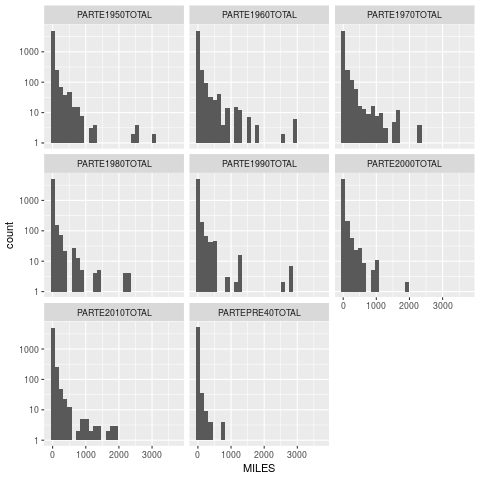

In [29]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    ggplot(aes(x=MILES)) + 
    geom_histogram() +
    facet_wrap(~DECADE, nrow=3) + 
    scale_y_log10()

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



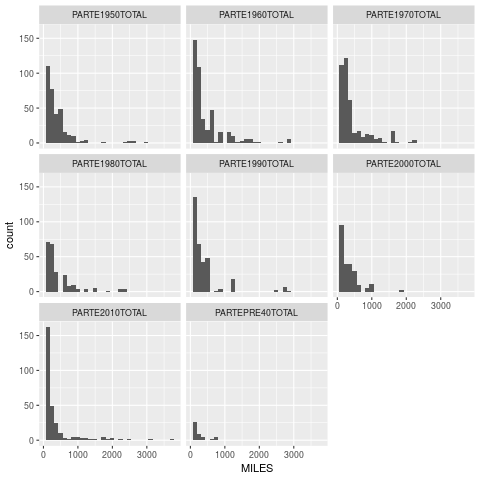

In [30]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    filter(MILES > 100) %>%
    ggplot(aes(x=MILES)) + 
    geom_histogram() +
    facet_wrap(~DECADE, nrow=3)

In [31]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    group_by(DECADE) %>%
    summarize(total_miles = sum(MILES))

# A tibble: 8 x 2
  DECADE          total_miles
  <chr>                 <dbl>
1 PARTE1950TOTAL      157897.
2 PARTE1960TOTAL      216401.
3 PARTE1970TOTAL      202377.
4 PARTE1980TOTAL      124982.
5 PARTE1990TOTAL      145727.
6 PARTE2000TOTAL      104471.
7 PARTE2010TOTAL      127693.
8 PARTEPRE40TOTAL      13968.


In [32]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    group_by(DECADE, REPORT_YEAR) %>%
    summarize(total_miles = sum(MILES)) %>%
    spread(REPORT_YEAR, total_miles)

# A tibble: 8 x 10
# Groups:   DECADE [8]
  DECADE          `2010` `2011` `2012` `2013` `2014` `2015` `2016` `2017` `2018`
  <chr>            <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
1 PARTE1950TOTAL  18215. 17787. 18754. 18026. 16827. 17642. 17164. 16595. 16887.
2 PARTE1960TOTAL  25484. 25091. 24753. 24387. 23923. 23284. 23782. 23417. 22280.
3 PARTE1970TOTAL  23080. 23235. 22704. 22526. 22095. 21733. 22518. 22303. 22183.
4 PARTE1980TOTAL  13802. 13885. 13816. 14206. 13423. 13729. 14179. 14091. 13851.
5 PARTE1990TOTAL  16440. 16401. 16198. 16289. 15995. 16052. 16007. 15934. 16410.
6 PARTE2000TOTAL  11546. 11631. 11581. 11683. 10951. 11072. 11479. 11283. 13243.
7 PARTE2010TOTAL    484.  1686.  4072.  9935. 15081. 18591. 22780. 26051. 29014.
8 PARTEPRE40TOTAL     0      0      0      0   2550.  3007.  2905.  2791.  2716.


The distribution across decades is surprisingly balanced. Strong trends are not discernible, there is the construction of new pipelines, and some pre-1980 pipelines are being retired.

## 2.6 How much % is offshore?

In [33]:
pipeline_offshore = pipelines[['OPERATOR_ID', 'REPORT_YEAR', 'PARTBHCAOFFSHORE', 'PARTBHCATOTAL', 'PARTA5COMMODITY']]

In [34]:
pipeline_offshore['PARTBHCAOFFSHORE'].isna().value_counts()

True     4676
False     633
Name: PARTBHCAOFFSHORE, dtype: int64

In [35]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    group_by(REPORT_YEAR) %>%
    summarize(perc_na = mean(is.na(PARTBHCAOFFSHORE)))

# A tibble: 9 x 2
  REPORT_YEAR perc_na
        <int>   <dbl>
1        2010   0.862
2        2011   0.869
3        2012   0.888
4        2013   0.859
5        2014   0.883
6        2015   0.893
7        2016   0.897
8        2017   0.863
9        2018   0.905


In [36]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    group_by(PARTA5COMMODITY) %>%
    summarize(perc_na = mean(is.na(PARTBHCAOFFSHORE)))

# A tibble: 5 x 2
  PARTA5COMMODITY                            perc_na
  <chr>                                        <dbl>
1 CO2                                          0.959
2 Crude Oil                                    0.779
3 Fuel Grade Ethanol (dedicated system)        1    
4 HVL                                          0.955
5 Refined and/or Petroleum Product (non-HVL)   0.926


In [37]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    mutate(missing_offshore = is.na(PARTBHCAOFFSHORE)) %>%
    group_by(OPERATOR_ID) %>%
    summarize(perc_missing = sprintf("%0.1f", sum(missing_offshore) / n())) %>%
    {table(.$perc_missing)}


0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 
 46   5   5   3   3   5   9  24  34  72 497 


In [38]:
%%R -i pipeline_offshore

pipeline_offshore %>% 
    #Picking a year at random
    filter(REPORT_YEAR == 2015) %>%
    mutate(perc_offshore = sprintf("%0.2f", PARTBHCAOFFSHORE / PARTBHCATOTAL)) %>%
    {table(.$perc_offshore)}


0.00 0.01 0.02 0.05 0.06 0.10 0.20 0.25 0.34 0.36 0.41 0.57 0.62 0.70 0.71 0.80 
  12    2    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0.84 0.85 0.86 0.91 0.99 1.00 
   1    1    1    1    1    4 


In [39]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    #Picking a year at random
    mutate(perc_offshore = sprintf("%0.1f", PARTBHCAOFFSHORE / PARTBHCATOTAL)) %>%
    {table(.$perc_offshore, .$REPORT_YEAR)}

     
      2010 2011 2012 2013 2014 2015 2016 2017 2018
  0.0   37   34   31   47   23   16   17   41   19
  0.1    5    4    2    4    3    2    3    3    3
  0.2    1    1    1    1    1    1    2    2    3
  0.3    2    3    2    3    2    2    1    0    0
  0.4    2    2    1    1    2    2    2    1    1
  0.5    0    0    0    0    0    0    1    1    1
  0.6    1    1    1    1    1    2    2    2    3
  0.7    2    2    1    1    1    2    1    2    3
  0.8    0    0    1    2    2    2    0    0    0
  0.9    4    5    5    3    2    3    3    3    2
  1.0    9   10   12   12    7    5    8    6    7


Are there any values close to 1, but not equal to 1?

In [40]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    mutate(perc_offshore = sprintf("%0.2f", PARTBHCAOFFSHORE / PARTBHCATOTAL)) %>%
    filter(perc_offshore > 0.8) %>%
    {table(.$perc_offshore, .$REPORT_YEAR)}

      
       2010 2011 2012 2013 2014 2015 2016 2017 2018
  0.80    0    0    1    1    1    1    0    0    0
  0.84    0    0    0    0    1    1    0    0    0
  0.85    0    0    0    0    0    1    1    0    0
  0.86    1    1    2    2    2    1    1    2    0
  0.87    1    1    0    0    0    0    0    0    0
  0.88    1    1    1    0    0    0    0    0    0
  0.91    1    1    1    0    0    1    1    1    1
  0.92    0    1    1    1    0    0    0    0    0
  0.94    0    0    0    0    0    0    0    0    1
  0.97    1    1    1    1    0    0    0    0    0
  0.99    0    0    1    1    0    1    1    1    0
  1.00    8    9   10   10    7    4    7    5    7


The presence of organizations that have a high share of offshore is somewhat concerning, because the data on the age of the pipelines does not differentiate between on and offshore. We could rectify this issue by removing any operators with offshore pipelines, since most operators do not have offshore pipelines. Let's see hwo many observations we would lose.

In [41]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    mutate(perc_offshore = PARTBHCAOFFSHORE / PARTBHCATOTAL) %>%
    mutate(perc_offshore = ifelse(is.na(perc_offshore), 0, perc_offshore)) %>%
    mutate(perc_offshore = sprintf("%0.2f", perc_offshore)) %>%
    {table(.$perc_offshore)}


0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.16 
5061    9    9    4    7    6    7    1    4    3    5    2    1    2    1    4 
0.17 0.19 0.20 0.21 0.24 0.25 0.29 0.30 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 
   1    2    3    2    1    7    2    1    4    1    5    1    1    1    2    3 
0.45 0.55 0.57 0.58 0.62 0.68 0.69 0.70 0.71 0.72 0.74 0.78 0.80 0.84 0.85 0.86 
   1    3    9    1    4    5    1    3    3    1    2    1    4    2    2   12 
0.87 0.88 0.91 0.92 0.94 0.97 0.99 1.00 
   2    3    7    3    1    4    5   67 


Looks like we can exclude offshore without losing too many observations.

In [42]:
%%R -i pipeline_offshore
pipeline_offshore %>%
    mutate(perc_offshore = PARTBHCAOFFSHORE / PARTBHCATOTAL) %>%
    mutate(perc_offshore = ifelse(is.na(perc_offshore), 0, perc_offshore)) %>%
    group_by(OPERATOR_ID) %>%
    summarize(offshore_max = max(perc_offshore)) %>%
    mutate(offshore_max = sprintf("%0.1f", offshore_max)) %>%
    {table(.$offshore_max)}


0.0 0.1 0.2 0.3 0.4 0.6 0.7 0.8 0.9 1.0 
660   5   2   2   2   2   2   1   6  21 


By setting a strict limit of no offshore, we will lose 43 out of 703 observations (organizations).

## 2.7 FERC Notices

In [43]:
notices = pd.read_csv('../data/ferc_notices_2019-08-01.csv')

len(notices)

27890

Check whether any notes were read incorrectly (too many requests).

In [44]:
notices['full-text'].str.contains('too manyrequests').value_counts()

False    27890
Name: full-text, dtype: int64